In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import pandas as pd
import os
%matplotlib inline

In [ ]:
nodes_file = "Department_Collaborate_node.csv"
nodes_df = pd.read_csv(nodes_file, header=None, names=["id", "label"])

edges_folder = "Department_Collaborate_Vision/"

In [ ]:
G = nx.MultiGraph()

for _, row in nodes_df.iterrows():
    G.add_node(row['id'], label=row['label'])

In [ ]:
for edge_file in os.listdir(edges_folder):
    if edge_file.endswith("_edges.csv"):
        layer_name = edge_file.replace("_edges.csv", "")
        edge_path = os.path.join(edges_folder, edge_file)
        edges_df = pd.read_csv(edge_path)

        for _, row in edges_df.iterrows():
            G.add_edge(row['Start_Node'], row['End_Node'], weight=row['Weight'], layer=layer_name)

In [ ]:
print("Nodes:", G.nodes(data=True))
print("Edges:", G.edges(data=True))

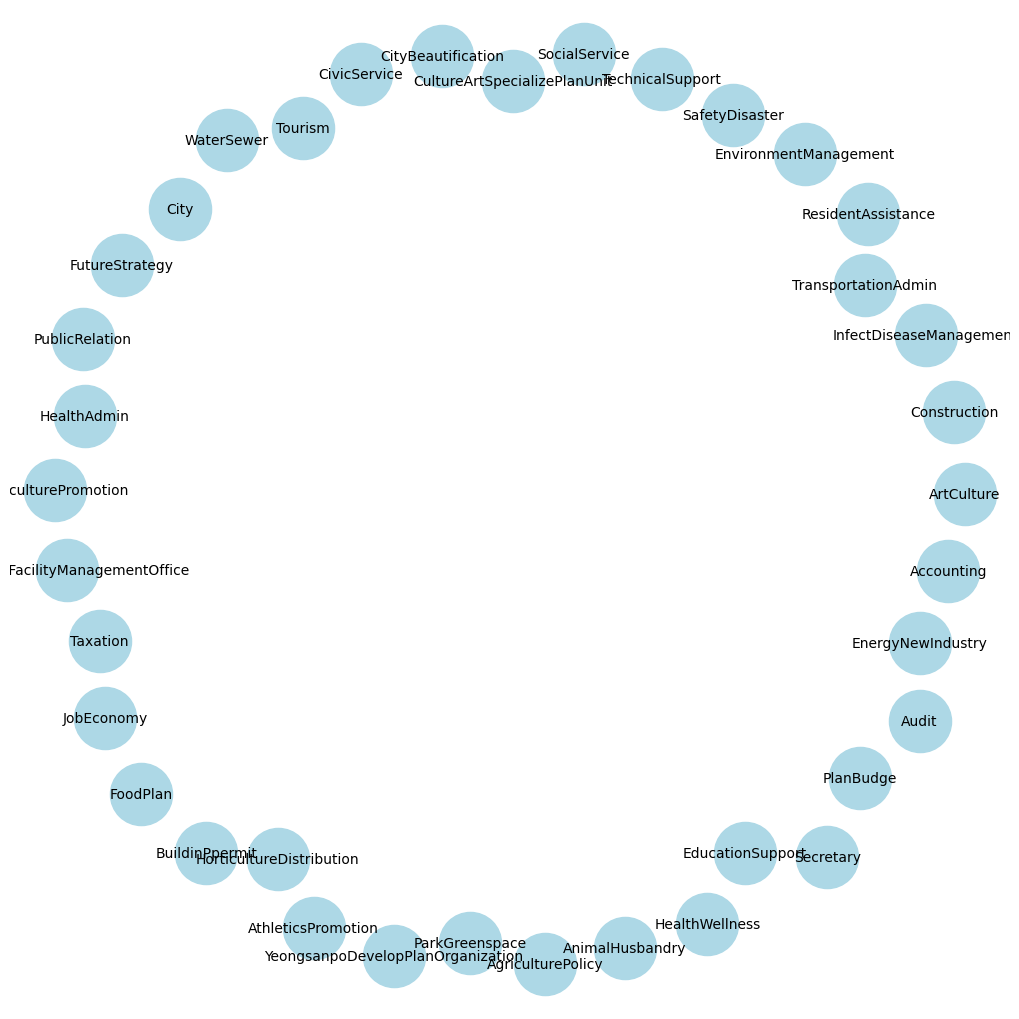

In [38]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=3.0, iterations=100)

# layers = {data['layer'] for _, _, data in G.edges(data=True)}
# colors = plt.cm.tab10(range(len(layers)))
# layer_to_color = {layer: color for layer, color in zip(layers, colors)}
# for layer in layers:
#     edges = [(u, v) for u, v, d in G.edges(data=True) if d['layer'] == layer]
#     nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=[layer_to_color[layer]] * len(edges), label=layer)

nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), 
        node_size=2000, node_color="lightblue", font_size=10, font_color="black")

# plt.title("Network Visualization", fontsize=16)
# plt.legend(handles=[plt.Line2D([0], [0], color=color, lw=2, label=layer) for layer, color in layer_to_color.items()])
plt.show()